# In this case study lets explain the Decision Tree regression using boston dataset

# About Dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollors
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in 1000 dollor's

## Import Section

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sks
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector 
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import random
from sklearn import tree


Lets load the data

In [17]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [18]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [21]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
def metrics(y_true,y_pred,model = 'Decision Tree Regressor'):
  r2_scores = r2_score(y_true,y_pred)
  p = 13 # number of features in the test dataset
  adjusted_r2_scores = 1- (1- r2_score(y_true,y_pred))*(len(y_true)-1)/(len(y_true)-p-1)
  median_absolute_errors = median_absolute_error(y_true,y_pred)
  mean_squared_errors = mean_squared_error(y_true,y_pred)
  mean_absolute_percentage_errors = mean_absolute_percentage_error(y_true,y_pred)
  mean_absolute_errors = mean_absolute_error(y_true,y_pred)
  print('r2_score for '+ model + " :" + str(r2_scores))
  print('adjusted_r2_score for '+ model + " :" + str(adjusted_r2_scores)) # Adj r2 = 1-(1-R2)*(n-1)/(n-p-1) Where n is the sample size and p is the number of independent variables.
  print('median_absolute_error for '+ model + " :" + str(median_absolute_errors))
  print('mean_squared_error for '+ model + " :" + str(mean_squared_errors))
  print('mean_absolute_percentage_error for '+ model + " :" + str(mean_absolute_percentage_errors))
  print('mean_absolute_error for '+ model + " :" + str(mean_absolute_errors))

In [30]:
X_train = pd.DataFrame(data = X_train , columns = boston.feature_names)
X_test = pd.DataFrame(data = X_test , columns = boston.feature_names)


In [78]:
reg = DecisionTreeRegressor(random_state=42)
ccp_alphas = reg.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
parameters = {"criterion" : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] , "ccp_alpha" : random.choices(ccp_alphas,k=50), "max_depth" : np.linspace(15, 25, num=10, dtype=int)}
Regressor = GridSearchCV(reg, parameters, cv = 5,scoring='neg_mean_absolute_error',error_score='raise')
Regressor.fit(X_train,y_train)
Regressor.best_estimator_



DecisionTreeRegressor(ccp_alpha=0.06653877887788805, criterion='friedman_mse',
                      max_depth=20, random_state=42)

In [79]:
Regressor = DecisionTreeRegressor(ccp_alpha=Regressor.best_estimator_.ccp_alpha, criterion=Regressor.best_estimator_.criterion,max_depth=Regressor.best_estimator_.max_depth, random_state=Regressor.best_estimator_.random_state)
Regressor.fit(X_train,y_train)
print("\n********* Train statistics *********\n")
metrics(y_train,Regressor.predict(X_train))
print("\n********* Test statistics *********\n")
metrics(y_test,Regressor.predict(X_test))


********* Train statistics *********

r2_score for Decision Tree Regressor :0.9713500959911857
adjusted_r2_score for Decision Tree Regressor :0.970395099190892
median_absolute_error for Decision Tree Regressor :0.9966176470588195
mean_squared_error for Decision Tree Regressor :2.4889146807331963
mean_absolute_percentage_error for Decision Tree Regressor :0.06504245851226545
mean_absolute_error for Decision Tree Regressor :1.2489064001928478

********* Test statistics *********

r2_score for Decision Tree Regressor :0.7144267860763014
adjusted_r2_score for Decision Tree Regressor :0.6722398340193914
median_absolute_error for Decision Tree Regressor :1.6666666666666643
mean_squared_error for Decision Tree Regressor :20.942164146277033
mean_absolute_percentage_error for Decision Tree Regressor :0.14122891358664297
mean_absolute_error for Decision Tree Regressor :2.5515735072309464


# lets see feature importance

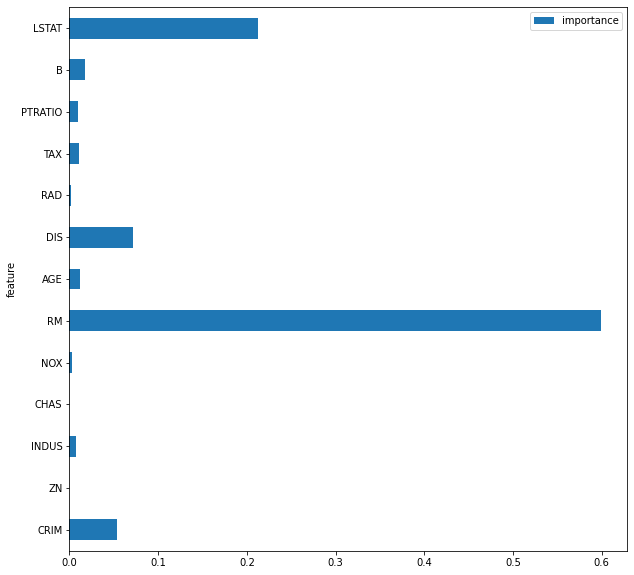

In [80]:
pd.DataFrame(data = zip(list(Regressor.feature_importances_),list(Regressor.feature_names_in_)), columns = ['importance','feature']).plot.barh(y = 'importance',x= 'feature',figsize=(10,10))

# Representing tree as text

In [81]:
text_representation = tree.export_text(Regressor, feature_names = list(X_train.columns))
print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)



|--- RM <= 0.88
|   |--- LSTAT <= 0.27
|   |   |--- DIS <= -1.14
|   |   |   |--- B <= -0.18
|   |   |   |   |--- value: [27.90]
|   |   |   |--- B >  -0.18
|   |   |   |   |--- value: [50.00]
|   |   |--- DIS >  -1.14
|   |   |   |--- RM <= 0.32
|   |   |   |   |--- RM <= -0.31
|   |   |   |   |   |--- RAD <= -0.92
|   |   |   |   |   |   |--- value: [16.13]
|   |   |   |   |   |--- RAD >  -0.92
|   |   |   |   |   |   |--- PTRATIO <= -0.21
|   |   |   |   |   |   |   |--- RM <= -1.56
|   |   |   |   |   |   |   |   |--- value: [15.30]
|   |   |   |   |   |   |   |--- RM >  -1.56
|   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |--- PTRATIO >  -0.21
|   |   |   |   |   |   |   |--- AGE <= -0.86
|   |   |   |   |   |   |   |   |--- RM <= -0.84
|   |   |   |   |   |   |   |   |   |--- value: [17.87]
|   |   |   |   |   |   |   |   |--- RM >  -0.84
|   |   |   |   |   |   |   |   |   |--- value: [21.79]
|   |   |   |   |   |   |   |--- AGE >  -0.86
|   |   |   

# Plot tree with plot_tree

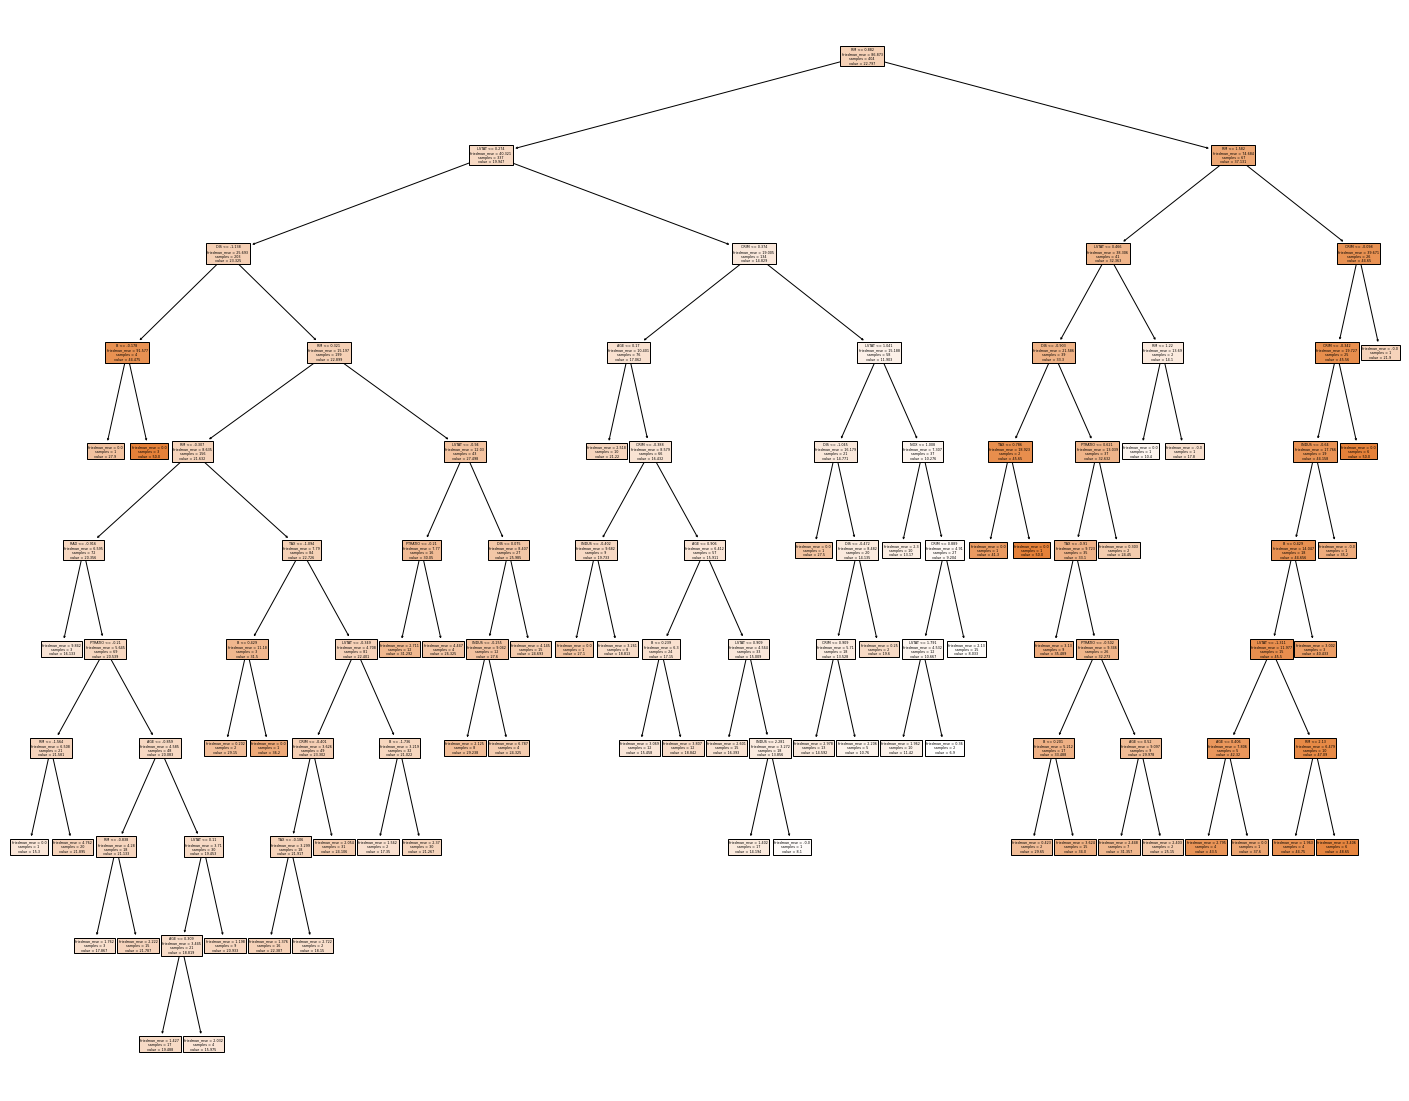

In [82]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Regressor,feature_names=Regressor.feature_names_in_,filled=True)
fig.savefig("decistion_tree.png")


# Lets Visualize Decision Tree with graphviz

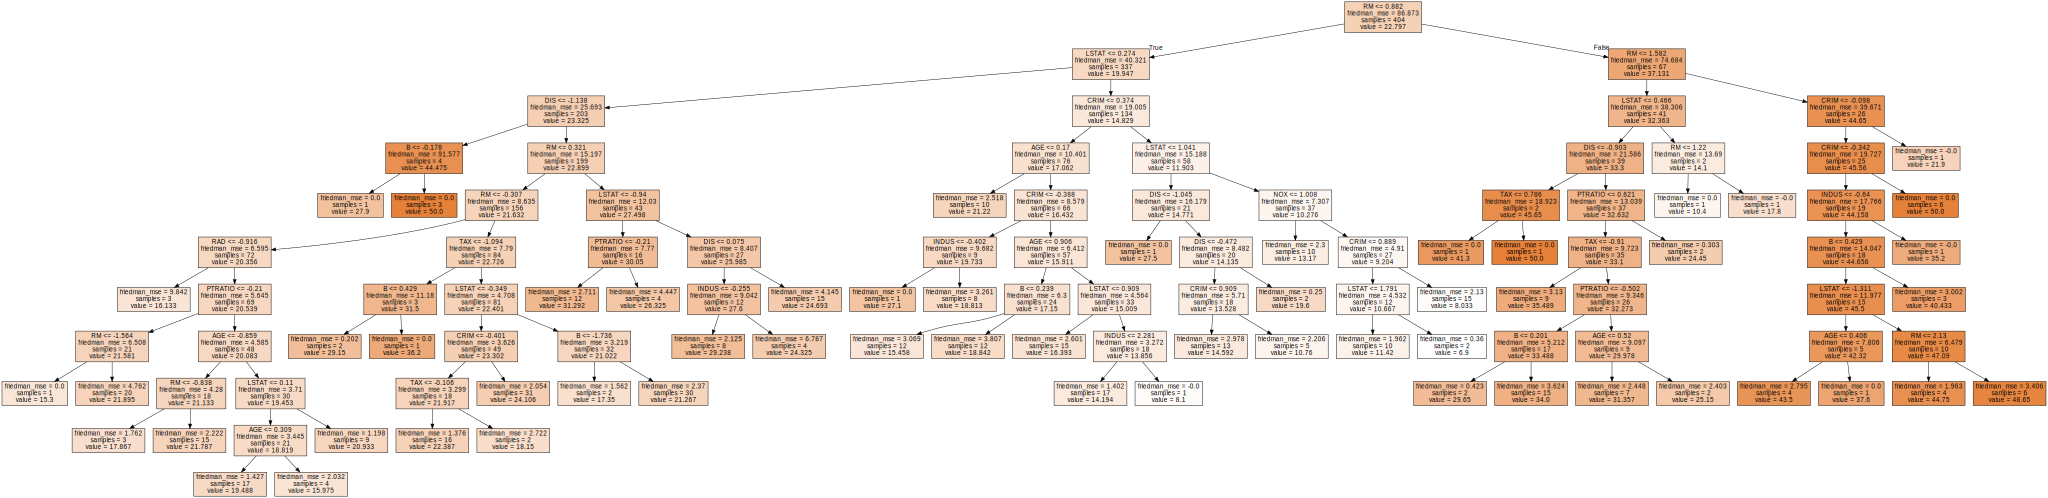

In [83]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(Regressor,feature_names=Regressor.feature_names_in_,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph



# lets Plot Decision Tree with dtreeviz Package

In [84]:
list(X_train.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [86]:
#! pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(Regressor, X_train, y_train,target_name="target",feature_names=list(X_train.columns))
viz

